# Explore here

In [ ]:
#Dataset Information

# Data Dictionary:
# Pregnancies. Number of pregnancies of the patient (numeric)
# Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
# BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
# SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
# Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
# BMI. Body mass index (numeric)
# DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
# Age. Age of patient (numeric)
# Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#------------ PREPROCESING --------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ----------- MACHINE LEARNING ----------
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# ----------- METRICS -------------------
from sklearn.metrics import accuracy_score
#------------ OPTIMIZATION --------------
from sklearn.model_selection import GridSearchCV

In [12]:
#Load Data
df_train_raw =  pd.read_csv('../data/raw/clean_train.csv')
df_test_raw =  pd.read_csv('../data/raw/clean_test.csv')

df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                576 non-null    int64  
 1   Pregnancies               576 non-null    int64  
 2   Glucose                   576 non-null    int64  
 3   BloodPressure             576 non-null    int64  
 4   SkinThickness             576 non-null    int64  
 5   Insulin                   576 non-null    int64  
 6   BMI                       576 non-null    float64
 7   DiabetesPedigreeFunction  576 non-null    float64
 8   Age                       576 non-null    int64  
 9   Outcome                   576 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 45.1 KB


In [13]:
df_train_raw.sample(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
222,28,13,145,82,19,110,22.2,0.245,57,0
333,493,4,125,70,18,122,28.9,1.144,45,1
7,129,0,105,84,0,0,27.9,0.741,62,1
93,658,11,127,106,0,0,39.0,0.190,51,0
210,268,0,102,52,0,0,25.1,0.078,21,0
343,177,0,129,110,46,130,67.1,0.319,26,1
224,60,2,84,0,0,0,0.0,0.304,21,0
482,756,7,137,90,41,0,32.0,0.391,39,0
535,519,6,129,90,7,326,19.6,0.582,60,0
518,353,1,90,62,12,43,27.2,0.580,24,0


In [7]:
#El dataset está bien estructurado, no contiene valores nulos y todas las variables son numericas.

In [14]:
X_train = df_train_raw.copy().drop(['Outcome'], axis=1)
y_train = df_train_raw['Outcome'].copy()
X_test  = df_test_raw.copy().drop(['Outcome'], axis=1)
y_test  = df_test_raw['Outcome'].copy()

In [15]:
#Al igual que con el Decision Tree, se decide aplicar un standard scaler a los datos
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [16]:
model_rfc = RandomForestClassifier(random_state = 1750)
model_rfc.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=1750)

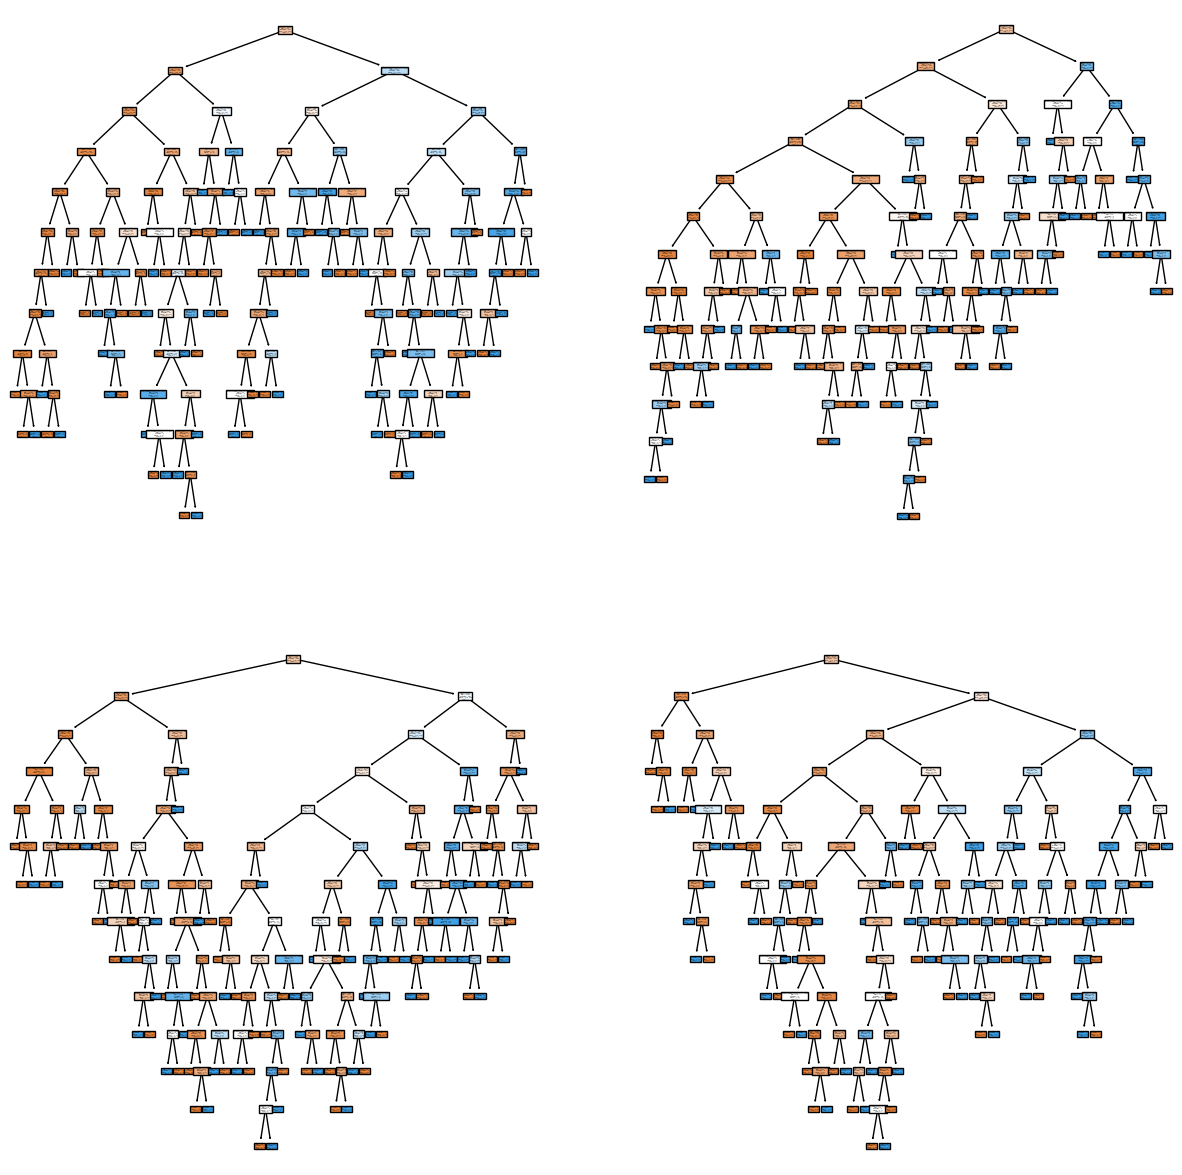

In [18]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model_rfc.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model_rfc.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model_rfc.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model_rfc.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [20]:
y_hat_rf = model_rfc.predict(X_test_sc)
y_hat_rf

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [21]:
as_rf = accuracy_score(y_test, y_hat_rf)

In [22]:
print(f'Accuracy: {as_rf}')

Accuracy: 0.78125


In [24]:
#Optimize the Model
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [31]:
param_grid = {
    # RandomForestRegressor().get_params().keys()
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf':[2,4,6],
    'random_state': [1800]
}

In [32]:
grid = GridSearchCV(model_rfc, param_grid, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1750),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [1800]},
             scoring='accuracy')

In [33]:
grid.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1750),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [1800]},
             scoring='accuracy')

In [34]:
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 1800}


In [35]:
model_grid = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=3, min_samples_leaf=4, random_state=1800)
model_grid.fit(X_train_sc, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=3,
                       random_state=1800)

In [36]:
y_hat_model_grid = model_grid.predict(X_test_sc)

In [37]:
ac_model_grid = accuracy_score(y_test,y_hat_model_grid)

In [38]:
print(f'Accuracy: {ac_model_grid}')

Accuracy: 0.78125


In [39]:
import pickle
file_name = '../models/decisiontreeclasifier1800.pkl'
pickle.dump(y_hat_model_grid, open(file_name, 'wb'))